In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

data = pd.read_excel("https://github.com/alfianpr/perhitungan-volume-objek-simetri/blob/main/beras/dataframe_beras.xlsx?raw=true", 
        usecols = ["volume", "pixel", "jarak"])

x, y = data[["pixel", "jarak"]], data.volume
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

print(model.rsquared_adj)

0.9079562075985473


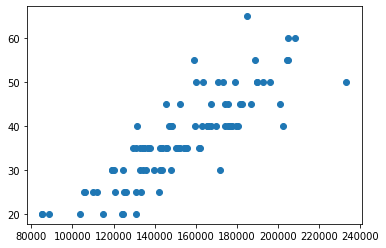

In [2]:
plt.scatter(data["pixel"], y)
plt.show()

In [3]:
data_30_5 = data.loc[data["jarak"] == 30.5]
data_35 = data.loc[data["jarak"] == 35]
data_33 = data.loc[data["jarak"] == 33]
data_31_5 = data.loc[data["jarak"] == 31.5]
data_32_2 = data.loc[data["jarak"] == 32.2]

x_30_5, y_30_5 = data_30_5[["pixel", "jarak"]], data_30_5.volume
x_35, y_35 = data_35[["pixel", "jarak"]], data_35.volume
x_33, y_33 = data_33[["pixel", "jarak"]], data_33.volume
x_31_5, y_31_5 = data_31_5[["pixel", "jarak"]], data_31_5.volume
x_32_2, y_32_2 = data_32_2[["pixel", "jarak"]], data_32_2.volume

x_30_5, x_35, x_33, x_31_5, x_32_2 = sm.add_constant(x_30_5), sm.add_constant(x_35) \
                                , sm.add_constant(x_33), sm.add_constant(x_31_5) \
                                , sm.add_constant(x_32_2)
model_30_5, model_35, model_33, model_31_5, model_32_2 = sm.OLS(y_30_5,x_30_5).fit(), sm.OLS(y_35,x_35).fit() \
    , sm.OLS(y_33,x_33).fit(), sm.OLS(y_31_5,x_31_5).fit(), sm.OLS(y_32_2, x_32_2).fit()

print("30.5 : ", model_30_5.rsquared_adj,"\n",  "35 : ", model_35.rsquared_adj, "\n", "33 : ", model_33.rsquared_adj
        ,"\n", "31.5 : ", model_31_5.rsquared_adj, "\n", "32.2 : ", model_32_2.rsquared_adj)


30.5 :  0.9416546499758434 
 35 :  0.9270294209617094 
 33 :  0.9697909661520561 
 31.5 :  0.9498790297454359 
 32.2 :  0.9320260224654732


In [8]:
data_new = data.loc[data["volume"] == 50]

data_new

,volume,jarak,pixel
3,50,30.5,233374
19,50,35.0,160071
29,50,35.0,163340
32,50,33.0,171050
42,50,33.0,173450
63,50,31.5,196045
71,50,32.2,189966
81,50,32.2,189925
89,50,32.2,179027
91,50,32.2,192577


In [6]:
data_test = data.loc[data["jarak"] == 30.5]
x, y = data_test[["pixel", "jarak"]], data_test.volume
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

print(model.rsquared_adj)

0.9416546499758434


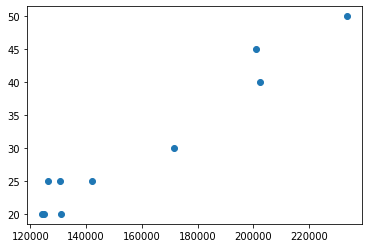

In [7]:
plt.scatter(data_test["pixel"], y)
plt.show()